In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

/home/oliver/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Volume increase and decrease

In [5]:
ddec=np.genfromtxt('build/VolumeDecrease_ReceiveOut_L.txt',delimiter=",")
dinc=np.genfromtxt('build/VolumeIncrease_ReceiveOut_L.txt',delimiter=",")

Text(0.5, 0, 'Sample number')

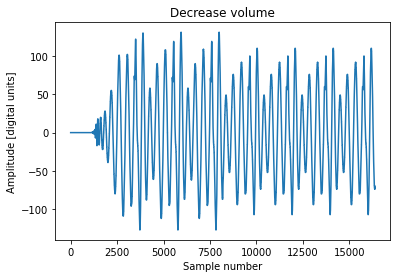

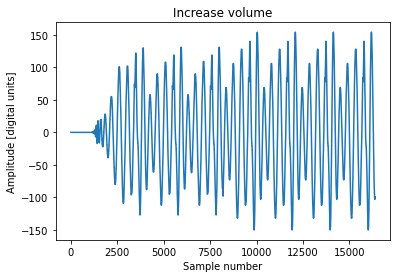

In [6]:
plt.figure(facecolor='white')
plt.plot(ddec)
plt.title("Decrease volume")
plt.ylabel("Amplitude [digital units]")
plt.xlabel("Sample number")

plt.figure(facecolor='white')
plt.plot(dinc)
plt.title("Increase volume")
plt.ylabel("Amplitude [digital units]")
plt.xlabel("Sample number")

# Zoom IIR filter

/home/oliver/.local/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Text(0, 0.5, 'Power [dB]')

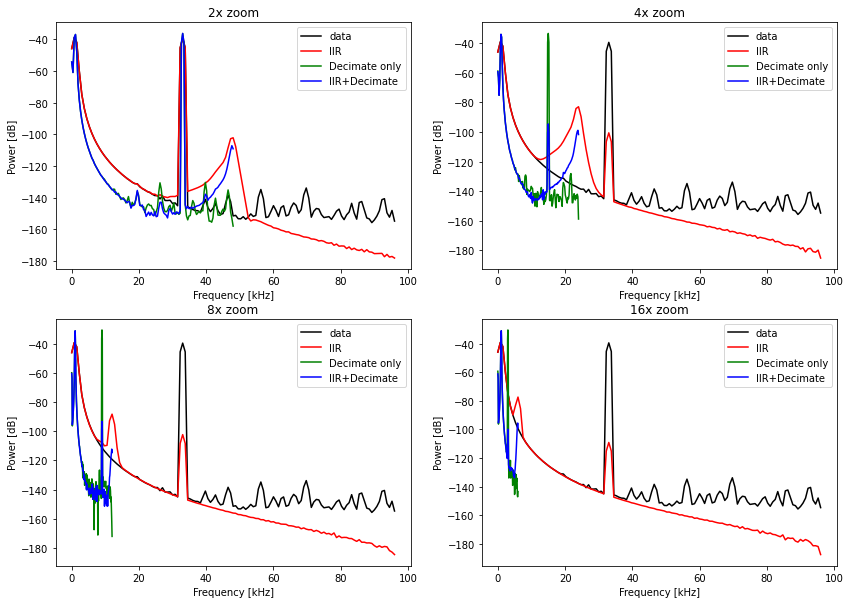

In [2]:
def read_iir_dec(zoom):
    d=np.genfromtxt('build/data_1k_33k.txt',delimiter=",")
    dI=np.genfromtxt('build/data_after_IIR_zoom_%d.txt'%zoom,delimiter=",")
    dID=np.genfromtxt('build/data_after_IIR_and_decimate_zoom_%d.txt'%zoom,delimiter=",")
    dD=np.genfromtxt('build/data_after_decimate_zoom_%d.txt'%zoom,delimiter=",")
    f,Pxx = welch(d[:,1],fs=192000,return_onesided=True)
    fI,PxxI = welch(dI[:,1],fs=192000,return_onesided=True)
    fID,PxxID = welch(dID[:,1],fs=192000/2**zoom,return_onesided=True)
    fD,PxxD = welch(dD[:,1],fs=192000/2**zoom,return_onesided=True)
    res = {'f_data':f,
           'P_data':Pxx,
           'f_IIR':fI,
           'P_IIR':PxxI,
           'f_IIR_dec':fID,
           'P_IIR_dec':PxxID,
           'f_dec':fD,
           'P_dec':PxxD}
    return res
res_1 = read_iir_dec(1)
res_2 = read_iir_dec(2)
res_3 = read_iir_dec(3)
res_4 = read_iir_dec(4)

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(res_1['f_data']/1000,10*np.log10(res_1['P_data']),'k-',label='data')
plt.plot(res_1['f_IIR']/1000,10*np.log10(res_1['P_IIR']),'r-',label='IIR')
plt.plot(res_1['f_dec']/1000,10*np.log10(res_1['P_dec']),'g-',label='Decimate only')
plt.plot(res_1['f_IIR_dec']/1000,10*np.log10(res_1['P_IIR_dec']),'b-',label='IIR+Decimate')
plt.title('2x zoom')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dB]')
plt.subplot(222)
plt.plot(res_2['f_data']/1000,10*np.log10(res_2['P_data']),'k-',label='data')
plt.plot(res_2['f_IIR']/1000,10*np.log10(res_2['P_IIR']),'r-',label='IIR')
plt.plot(res_2['f_dec']/1000,10*np.log10(res_2['P_dec']),'g-',label='Decimate only')
plt.plot(res_2['f_IIR_dec']/1000,10*np.log10(res_2['P_IIR_dec']),'b-',label='IIR+Decimate')
plt.title('4x zoom')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dB]')

plt.subplot(223)
plt.plot(res_3['f_data']/1000,10*np.log10(res_3['P_data']),'k-',label='data')
plt.plot(res_3['f_IIR']/1000,10*np.log10(res_3['P_IIR']),'r-',label='IIR')
plt.plot(res_3['f_dec']/1000,10*np.log10(res_3['P_dec']),'g-',label='Decimate only')
plt.plot(res_3['f_IIR_dec']/1000,10*np.log10(res_3['P_IIR_dec']),'b-',label='IIR+Decimate')
plt.title('8x zoom')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dB]')

plt.subplot(224)
plt.plot(res_4['f_data']/1000,10*np.log10(res_4['P_data']),'k-',label='data')
plt.plot(res_4['f_IIR']/1000,10*np.log10(res_4['P_IIR']),'r-',label='IIR')
plt.plot(res_4['f_dec']/1000,10*np.log10(res_4['P_dec']),'g-',label='Decimate only')
plt.plot(res_4['f_IIR_dec']/1000,10*np.log10(res_4['P_IIR_dec']),'b-',label='IIR+Decimate')
plt.title('16x zoom')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('Power [dB]')


# Zoom FFT

In [3]:
def plot_FFT_shift_zoom(zoom):
    e=np.genfromtxt('build/zoomFFT%dpreshift_IQ.txt'%zoom,delimiter=",")
    f,Pxx = welch(e[:,1]+1j*e[:,2],fs=192000,return_onesided=False)
    e=np.genfromtxt('build/zoomFFT%dpostshift_IQ.txt'%zoom,delimiter=",")
    fs,Pxxs = welch(e[:,1]+1j*e[:,2],fs=192000,return_onesided=False)

    Imx = np.argmax(Pxx)
    Imxs= np.argmax(Pxxs)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(f,np.log10(Pxx)*10,'k-',
            fs,np.log10(Pxxs)*10,'r-')
    plt.title("Max at %d Hz and %d Hz"%(f[Imx],fs[Imxs]))

    e=np.genfromtxt('build/zoomFFT%d_psd.txt'%zoom,delimiter=",")
    Imx = np.argmax(e[:,1])
    plt.subplot(1,2,2)
    plt.plot(e[:,0],10*e[:,1],'k-')
    #plt.xlim([230,250])
    plt.ylabel("Power [dB]")
    plt.xlabel("PSD Frequency Bins")
    plt.title("Zoom=%d: max at bin %d = %5.4f"%(zoom,Imx,e[Imx,1]))
    return e[Imx,1]

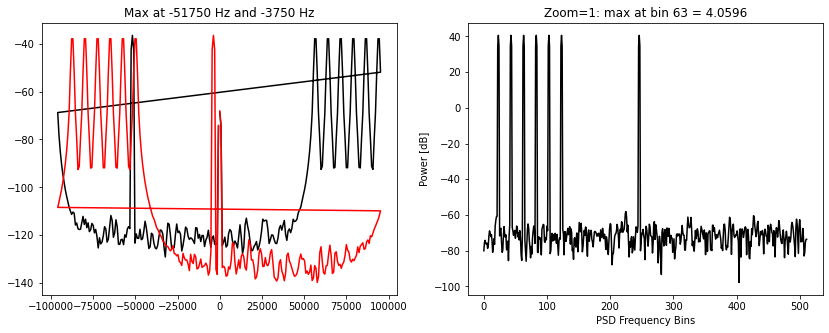

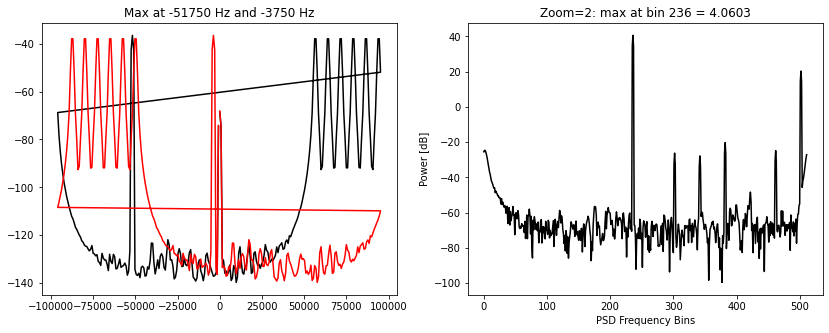

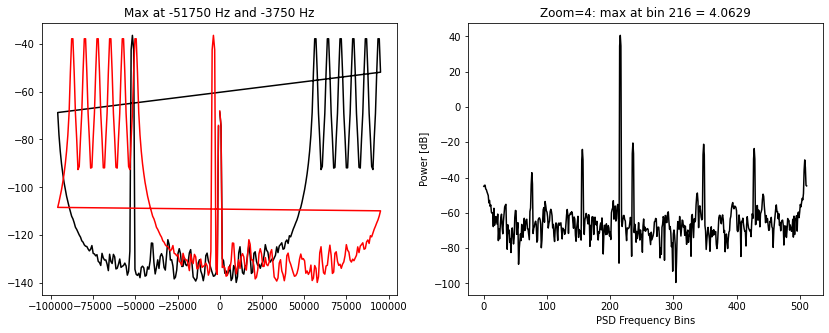

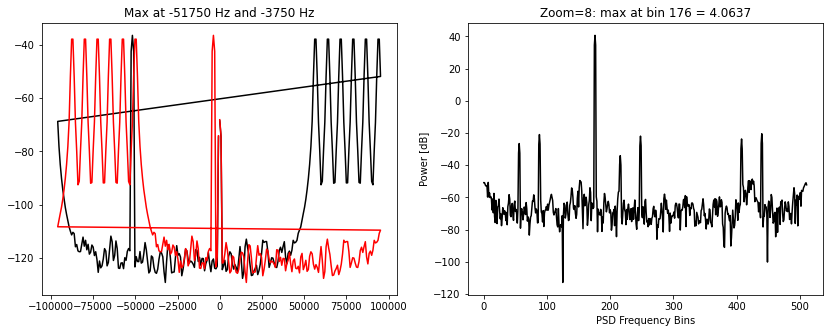

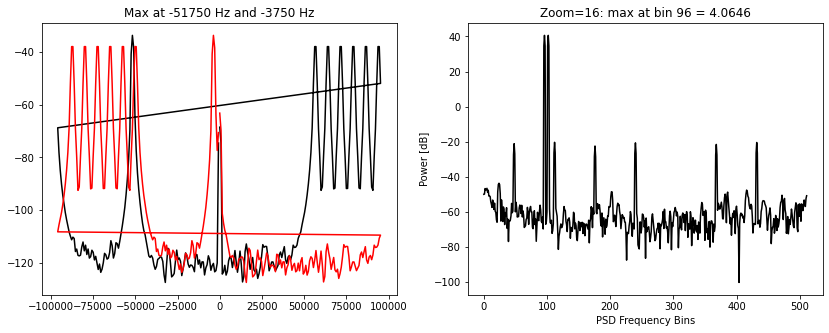

In [4]:
zooms = np.array([1,2,4,8,16])
mags = np.zeros(len(zooms))
for k in range(len(zooms)):
    mags[k] = plot_FFT_shift_zoom(zooms[k])

Text(0, 0.5, 'Magnitude [linear]')

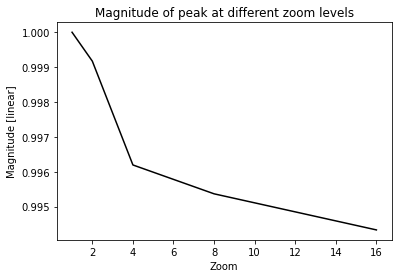

In [5]:
att = 10*(mags-mags[0])
plt.figure()
plt.plot(zooms,10**(-att/20),'k-')
plt.title("Magnitude of peak at different zoom levels")
plt.xlabel("Zoom")
plt.ylabel("Magnitude [linear]")

# Frequency Shift

## Frequency moves correctly

In [2]:
def frequency_to_bin(freq, Nbins, SampleRate):
    return (Nbins/2 + ( Nbins * freq / SampleRate ))

Text(0.5, 1.0, 'Max -36.5321 at 197')

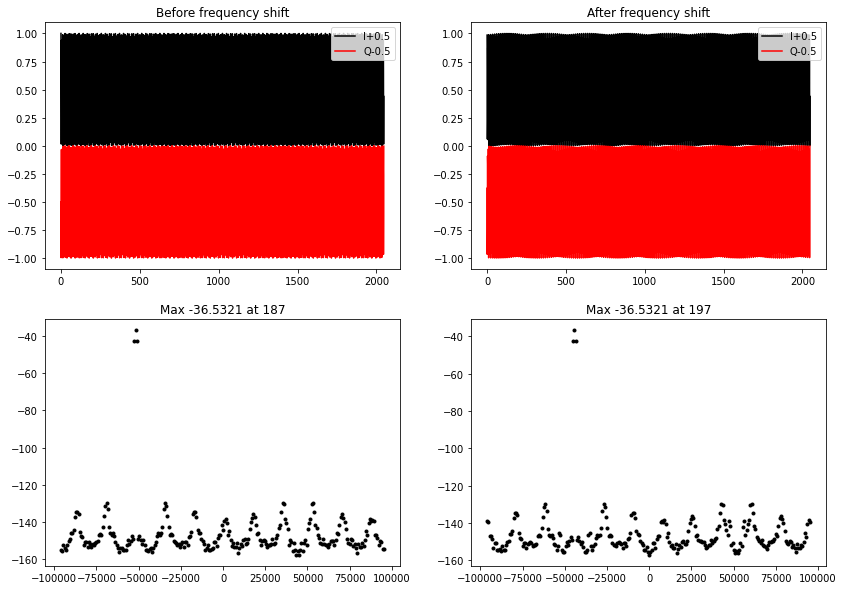

In [4]:
bt=np.genfromtxt('build/fineTuneTranslate_pretranslate_IQ.txt',delimiter=",")
at=np.genfromtxt('build/fineTuneTranslate_posttranslate_IQ.txt',delimiter=",")
fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=192000,return_onesided=False)
fa,Pa = welch(at[:,1]+1j*at[:,2],fs=192000,return_onesided=False)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(bt[:,0],bt[:,1]+0.5,'k-',label='I+0.5')
plt.plot(bt[:,0],bt[:,2]-0.5,'r-',label='Q-0.5')
plt.legend()
plt.title("Before frequency shift")

plt.subplot(2,2,2)
plt.plot(at[:,0],at[:,1]+0.5,'k-',label='I+0.5')
plt.plot(at[:,0],at[:,2]-0.5,'r-',label='Q-0.5')
plt.legend()
plt.title("After frequency shift")

plt.subplot(2,2,3)
plt.plot(fb,10*np.log10(Pb),'k.')
Im = np.argmax(Pb)
plt.title("Max %5.4f at %d"%(10*np.log10(Pb[Im]),Im))

plt.subplot(2,2,4)
plt.plot(fa,10*np.log10(Pa),'k.')
Im = np.argmax(Pa)
plt.title("Max %5.4f at %d"%(10*np.log10(Pa[Im]),Im))

## Phase discontinuity

Text(0.5, 1.0, 'Max at bin 299 = 4.0623')

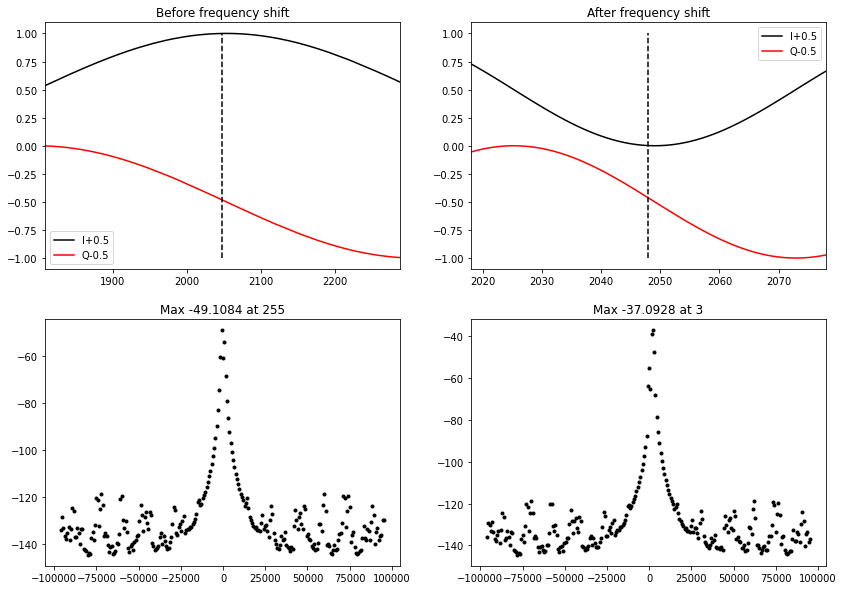

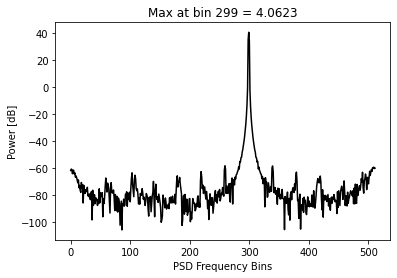

In [8]:
bt=np.genfromtxt('build/fineTunePhase_pretranslate_IQ.txt',delimiter=",")
at=np.genfromtxt('build/fineTunePhase_posttranslate_IQ.txt',delimiter=",")
fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=192000,return_onesided=False)
fa,Pa = welch(at[:,1]+1j*at[:,2],fs=192000,return_onesided=False)

N = 30
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(bt[:,0],bt[:,1]+0.5,'k-',label='I+0.5')
plt.plot(bt[:,0],bt[:,2]-0.5,'r-',label='Q-0.5')
plt.plot([2048,2048],[-1,1],'k--')
plt.xlim([2048-N*8,2048+N*8])
plt.legend()
plt.title("Before frequency shift")

plt.subplot(2,2,2)
plt.plot(at[:,0],at[:,1]+0.5,'k-',label='I+0.5')
plt.plot(at[:,0],at[:,2]-0.5,'r-',label='Q-0.5')
plt.plot([2048,2048],[-1,1],'k--')
plt.xlim([2048-N,2048+N])
plt.legend()
plt.title("After frequency shift")

plt.subplot(2,2,3)
plt.plot(fb,10*np.log10(Pb),'k.')
Im = np.argmax(Pb)
plt.title("Max %5.4f at %d"%(10*np.log10(Pb[Im]),Im))

plt.subplot(2,2,4)
plt.plot(fa,10*np.log10(Pa),'k.')
Im = np.argmax(Pa)
plt.title("Max %5.4f at %d"%(10*np.log10(Pa[Im]),Im))

e=np.genfromtxt('build/fineTunePhase_psd.txt',delimiter=",")
Imx = np.argmax(e[:,1])
plt.figure()
plt.plot(e[:,0],10*e[:,1],'k-')
plt.ylabel("Power [dB]")
plt.xlabel("PSD Frequency Bins")
plt.title("Max at bin %d = %5.4f"%(Imx,e[Imx,1]))

Text(0.5, 1.0, 'Max -36.5007 at 750.0 Hz (1)')

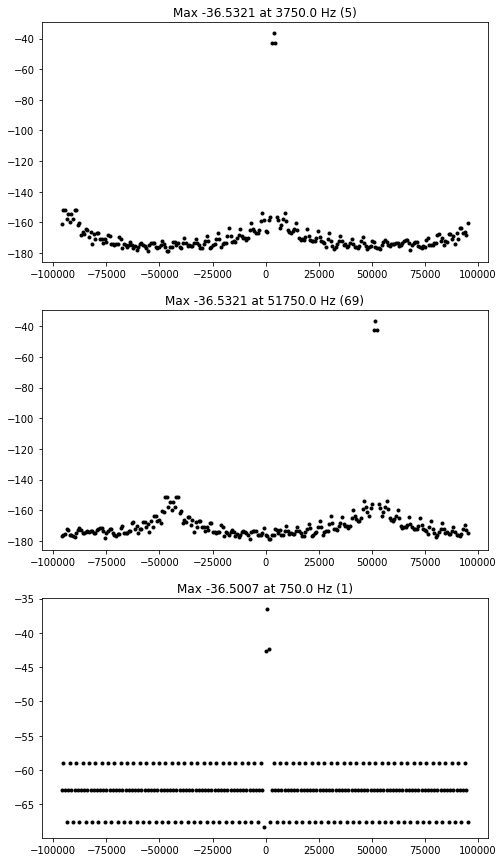

In [11]:
bt=np.genfromtxt('build/frequencyTranslate_pretranslate_IQ.txt',delimiter=",")
mt=np.genfromtxt('build/frequencyTranslate_midcourse_IQ.txt',delimiter=",")
at=np.genfromtxt('build/frequencyTranslate_posttranslate_IQ.txt',delimiter=",")

fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=192000,return_onesided=False)
fm,Pm = welch(mt[:,1]+1j*mt[:,2],fs=192000,return_onesided=False)
fa,Pa = welch(at[:,1]+1j*at[:,2],fs=192000,return_onesided=False)

plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.plot(fb,10*np.log10(Pb),'k.')
Im = np.argmax(Pb)
plt.title("Max %5.4f at %2.1f Hz (%d)"%(10*np.log10(Pb[Im]),fb[Im],Im))

plt.subplot(3,1,2)
plt.plot(fm,10*np.log10(Pm),'k.')
Im = np.argmax(Pm)
plt.title("Max %5.4f at %2.1f Hz (%d)"%(10*np.log10(Pm[Im]),fm[Im],Im))

plt.subplot(3,1,3)
plt.plot(fa,10*np.log10(Pa),'k.')
Im = np.argmax(Pa)
plt.title("Max %5.4f at %2.1f Hz (%d)"%(10*np.log10(Pa[Im]),fa[Im],Im))


# Decimate by N

In [9]:
def plot_decimate_by_N(N,fsample=192000):
    bt=np.genfromtxt('build/DecimateBy%d_original_IQ.txt'%N,delimiter=",")
    at=np.genfromtxt('build/DecimateBy%d_decimated_IQ.txt'%N,delimiter=",")
    fb,Pb = welch(bt[:,1]+1j*bt[:,2],fs=fsample,return_onesided=False)
    fa,Pa = welch(at[:,1]+1j*at[:,2],fs=fsample/N,return_onesided=False)

    plt.figure(figsize=(14,10))
    plt.subplot(2,2,1)
    plt.plot(bt[:,0],bt[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(bt[:,0],bt[:,2]-0.5,'r-',label='Q-0.5')
    plt.xlim([0,300])
    plt.grid()
    plt.legend()
    plt.title("Before decimation")

    plt.subplot(2,2,2)
    plt.plot(at[:,0],at[:,1]+0.5,'k-',label='I+0.5')
    plt.plot(at[:,0],at[:,2]-0.5,'r-',label='Q-0.5')
    plt.xlim([0,300])
    plt.grid()
    plt.legend()
    plt.title("After decimation by %d"%N)

    plt.subplot(2,2,3)
    plt.plot(fb,10*np.log10(Pb),'k.')
    plt.grid()
    Im = np.argmax(Pb)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pb[Im]),Im,fb[Im]))

    plt.subplot(2,2,4)
    plt.plot(fa,10*np.log10(Pa),'k.')
    plt.grid()
    Im = np.argmax(Pa)
    plt.title("Max %5.4f at f[%d]=%2.1fHz"%(10*np.log10(Pa[Im]),Im,fa[Im]))
    plt.text(fa[Im+5],10*np.log10(Pa[Im]),"Peak-floor=%2.1f"%(10*np.log10(Pa[Im])-10*np.log10(Pa[Im-10])))

    e=np.genfromtxt('build/DecimateBy%d_psd.txt'%N,delimiter=",")
    Imx = np.argmax(e[:,1])
    plt.figure()
    plt.plot(e[:,0],10*e[:,1],'k-')
    plt.grid()
    plt.ylabel("Power [dB]")
    plt.xlabel("PSD Frequency Bins")
    plt.title("Max at bin %d = %5.4f"%(Imx,e[Imx,1]))
    plt.text(Imx+5,10*e[Imx,1],"Peak-floor=%2.1f"%(10*(e[Imx,1]-e[Imx-10,1])))

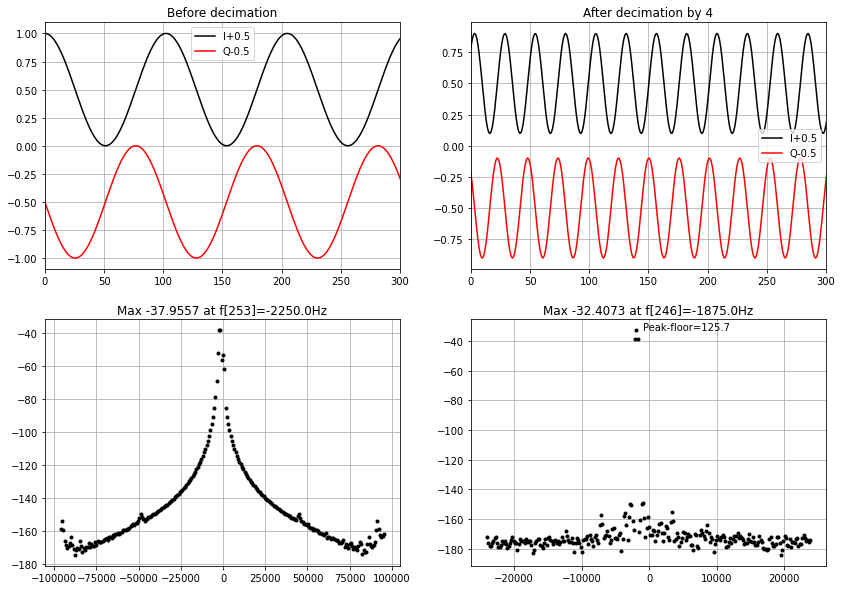

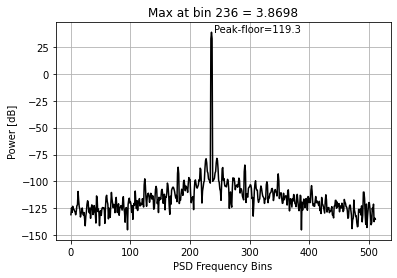

In [10]:
plot_decimate_by_N(4)

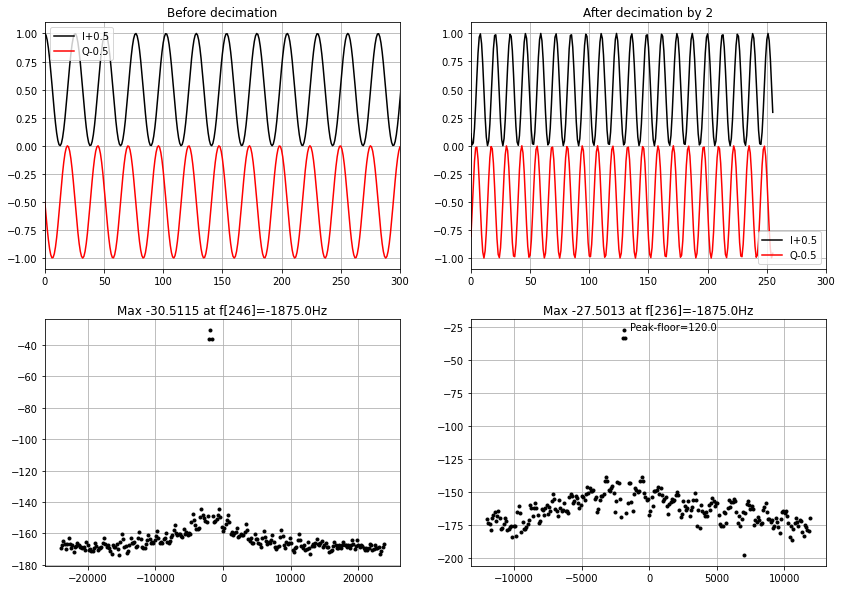

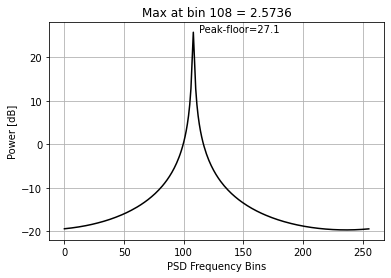

In [11]:
plot_decimate_by_N(2,fsample=192000/4)

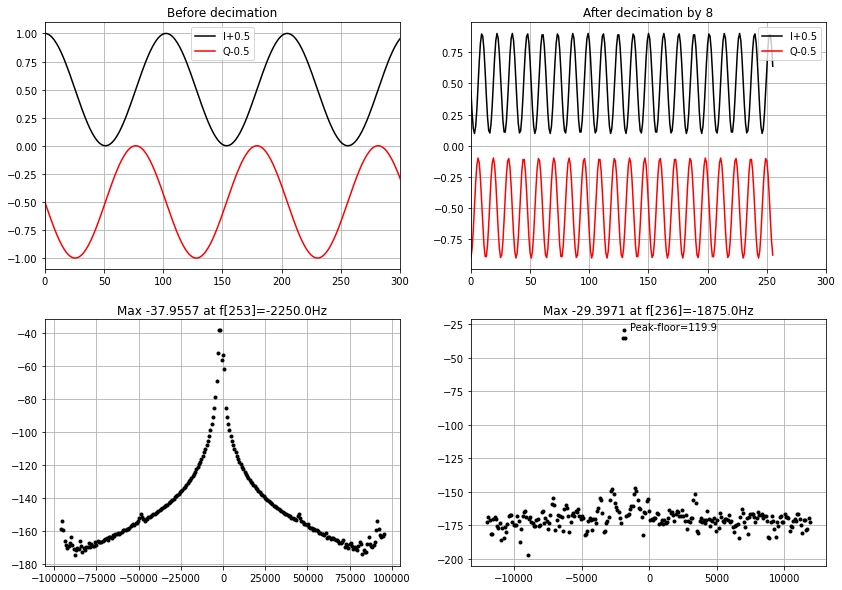

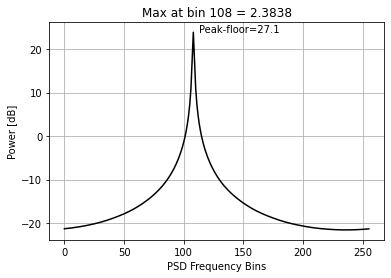

In [12]:
plot_decimate_by_N(8)

# Complex FIR Coefficients

Text(0, 0.5, 'Imag part of filter mask')

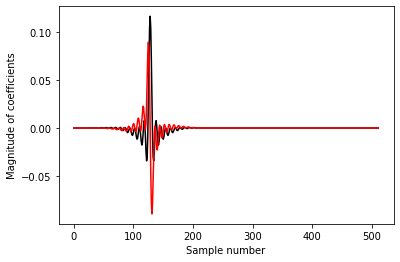

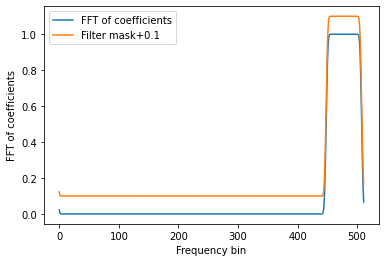

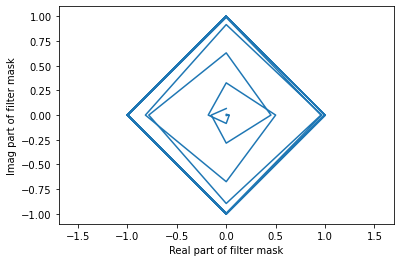

In [15]:
b=np.genfromtxt('build/FIR_filter_mask.txt',delimiter=",")
c=np.genfromtxt('build/FIR_filter_samples.txt',delimiter=",")

Ff = b[0::2,1]+1j*b[1::2,1] # Make complex FIR filter mask

farr = c[0::2,1]+1j*c[1::2,1]
F = np.fft.fft(farr)

plt.figure()
plt.plot(c[0::2,1],'k-')
plt.plot(c[1::2,1],'r-')
plt.xlabel('Sample number')
plt.ylabel("Magnitude of coefficients")

plt.figure()
plt.plot(np.abs(F),label='FFT of coefficients')
plt.plot(np.abs(Ff)+0.1,label='Filter mask+0.1')
plt.legend()
plt.xlabel('Frequency bin')
plt.ylabel("FFT of coefficients")

plt.figure()
plt.plot(b[0::2,1],b[1::2,1])
plt.axis('equal')
plt.xlabel("Real part of filter mask")
plt.ylabel("Imag part of filter mask")

Text(0.5, 1.0, 'Shifted FFT')

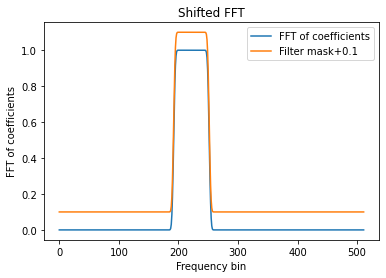

In [16]:
plt.figure()
plt.plot(np.abs(np.fft.fftshift(F)),label='FFT of coefficients')
plt.plot(np.abs(np.fft.fftshift(Ff))+0.1,label='Filter mask+0.1')
plt.legend()
plt.xlabel('Frequency bin')
plt.ylabel("FFT of coefficients")
plt.title("Shifted FFT")

# Convolution Filter

Text(0, 0.5, 'PSD [dB]')

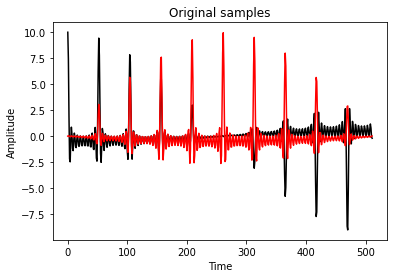

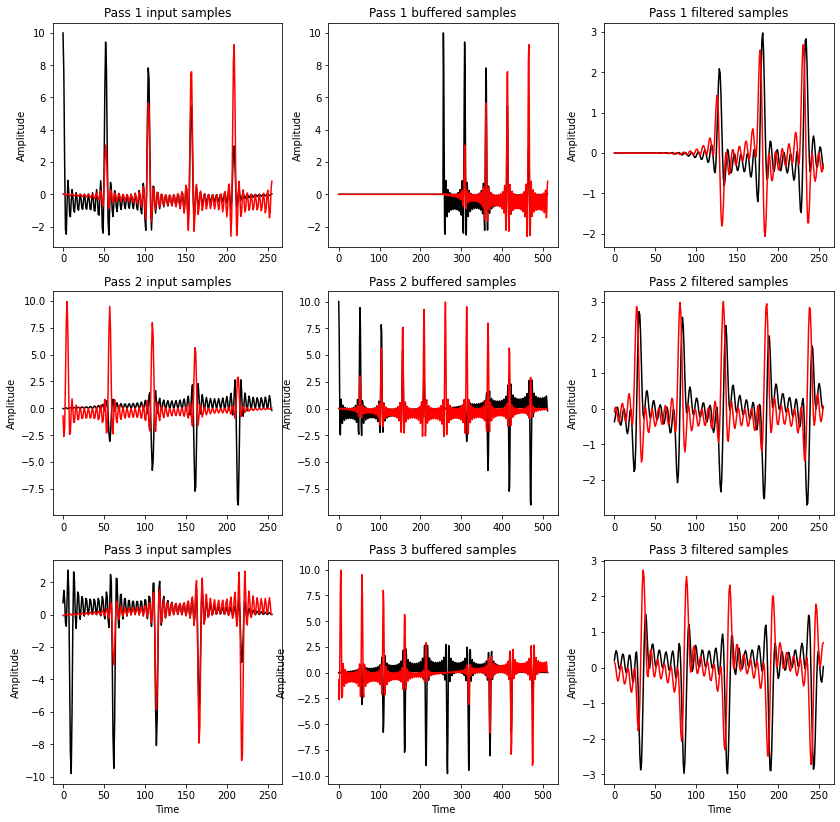

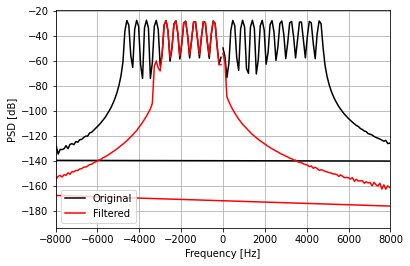

In [17]:
po =np.genfromtxt('build/ConvolutionFilter_original_IQ.txt',delimiter=",")

p1in =np.genfromtxt('build/fIQ_ConvolutionFilter_pass1.txt',delimiter=",")
p1buf=np.genfromtxt('build/ConvolutionFilter_pass1.txt',delimiter=",")
p1out=np.genfromtxt('build/ConvolutionFilter_pass1_filtered_IQ.txt',delimiter=",")

p2in =np.genfromtxt('build/fIQ_ConvolutionFilter_pass2.txt',delimiter=",")
p2buf=np.genfromtxt('build/ConvolutionFilter_pass2.txt',delimiter=",")
p2out=np.genfromtxt('build/ConvolutionFilter_pass2_filtered_IQ.txt',delimiter=",")

p3in =np.genfromtxt('build/fIQ_ConvolutionFilter_pass3.txt',delimiter=",")
p3buf=np.genfromtxt('build/ConvolutionFilter_pass3.txt',delimiter=",")
p3out=np.genfromtxt('build/ConvolutionFilter_pass3_filtered_IQ.txt',delimiter=",")

def deinterleave(pout):
    # deinterleave the outputs
    pout = np.concatenate([pout[512:],pout[:512]])
    pout[:,0] = np.arange(1024)
    return pout

# deinterleave the outputs
#p1out = deinterleave(p1out)
#p2out = deinterleave(p2out)
#p3out = deinterleave(p3out)

plt.figure()
plt.plot(po[:,0],po[:,1],'k-')
plt.plot(po[:,0],po[:,2],'r-')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Original samples')

ylims = [-1,1]
plt.figure(figsize=(14,14))
plt.subplot(3,3,1)
plt.plot(p1in[:,0],p1in[:,1],'k-')
plt.plot(p1in[:,0],p1in[:,2],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 1 input samples')

plt.subplot(3,3,2)
plt.plot(p1buf[0::2,0]/2,p1buf[0::2,1],'k-')
plt.plot(p1buf[0::2,0]/2,p1buf[1::2,1],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 1 buffered samples')

plt.subplot(3,3,3)
plt.plot(p1out[:,0],p1out[:,1],'k-')
plt.plot(p1out[:,0],p1out[:,2],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 1 filtered samples')


plt.subplot(3,3,1+3)
plt.plot(p2in[:,0],p2in[:,1],'k-')
plt.plot(p2in[:,0],p2in[:,2],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 2 input samples')

plt.subplot(3,3,2+3)
plt.plot(p2buf[0::2,0]/2,p2buf[0::2,1],'k-')
plt.plot(p2buf[0::2,0]/2,p2buf[1::2,1],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 2 buffered samples')

plt.subplot(3,3,3+3)
plt.plot(p2out[:,0],p2out[:,1],'k-')
plt.plot(p2out[:,0],p2out[:,2],'r-')
#plt.ylim(ylims)
#plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 2 filtered samples')


plt.subplot(3,3,1+6)
plt.plot(p3in[:,0],p3in[:,1],'k-')
plt.plot(p3in[:,0],p3in[:,2],'r-')
#plt.ylim(ylims)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 3 input samples')

plt.subplot(3,3,2+6)
plt.plot(p3buf[0::2,0]/2,p3buf[0::2,1],'k-')
plt.plot(p3buf[0::2,0]/2,p3buf[1::2,1],'r-')
#plt.ylim(ylims)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 3 buffered samples')

plt.subplot(3,3,3+6)
plt.plot(p3out[:,0],p3out[:,1],'k-')
plt.plot(p3out[:,0],p3out[:,2],'r-')
#plt.ylim(ylims)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title('Pass 3 filtered samples')



fa,Pa = welch(po[:,1]+1j*po[:,2],fs=192000/8,return_onesided=False)
f,P = welch(p3out[:,1]+1j*p3out[:,2],fs=192000/8,return_onesided=False)
plt.figure()
plt.plot(fa,10*np.log10(Pa),'k-',label='Original')
plt.plot(f,10*np.log10(P),'r-',label='Filtered')
plt.legend()
plt.xlim([-8000,8000])
plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel('PSD [dB]')

In [18]:
def frequency_to_bin(freq, Nbins, SampleRate):
    return (int)(Nbins/2 + np.ceil( Nbins * freq / SampleRate ))

m=1,bin=247,freq=-468.75
m=2,bin=237,freq=-937.50
m=3,bin=227,freq=-1406.25
m=4,bin=217,freq=-1875.00
m=5,bin=207,freq=-2343.75
m=6,bin=197,freq=-2812.50
m=10,bin=157,freq=-4687.50
m=11,bin=147,freq=-5156.25
m=12,bin=137,freq=-5625.00


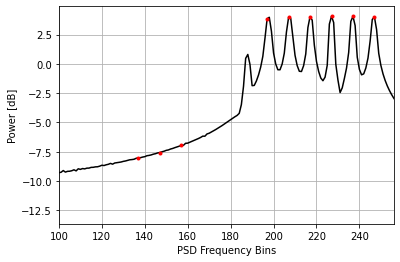

In [19]:
e=np.genfromtxt('build/ConvolutionFilter_filtered_PSD.txt',delimiter=",")

bw = 192000/8/512

plt.figure()
plt.plot(e[:,0],e[:,1],'k-')
for m in range(1,7):
    b0 = frequency_to_bin(-m*192000/8/512*10+bw/2, 512, 192000/8)
    print("m=%d,bin=%d,freq=%3.2f"%(m,b0,-m*192000/8/512*10))
    plt.plot(e[b0,0],e[b0,1],'r.')

    
for m in range(10,13):
    b0 = frequency_to_bin(-m*192000/8/512*10+bw/2, 512, 192000/8)
    print("m=%d,bin=%d,freq=%3.2f"%(m,b0,-m*192000/8/512*10))
    plt.plot(e[b0,0],e[b0,1],'r.')

    

plt.ylabel("Power [dB]")
plt.xlabel("PSD Frequency Bins")
plt.xlim([100,256])
#plt.ylim([-2.5,5])
plt.grid()

# AGC

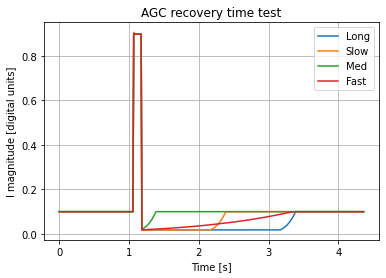

In [21]:
labels = ["Off","Long","Slow","Med","Fast"]

plt.figure()
for i in range(1,5):
    a = np.genfromtxt('build/AGC%d_Imagnitudes.txt'%i,delimiter=",")
    t_s = a[:,0]*256/(192000/8)
    plt.plot(t_s,a[:,1],label=labels[i])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("I magnitude [digital units]")
plt.title("AGC recovery time test")
#plt.ylim([0,0.25])
#plt.xlim([100,320])
plt.legend()

# AM IIR Filter

Text(0.5, 1.0, 'AM Demodulation IIR Filter Response')

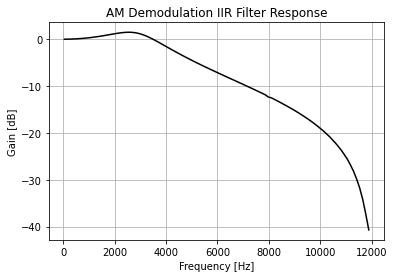

In [22]:
pb = np.genfromtxt('build/AudioIIRPassband.txt',delimiter=",")

plt.figure()
plt.plot(pb[:,1],np.log10(pb[:,2])*10,'k-')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel("Gain [dB]")
plt.title("AM Demodulation IIR Filter Response")

# AM Demodulation

Text(0.5, 1.0, 'AM demodulation')

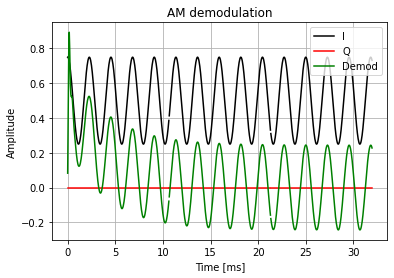

In [23]:
plt.figure()
t_s = a[:,0]
for k in range(1,4):
    amin = np.genfromtxt('build/DemodAM_IQ_pass%d.txt'%k,delimiter=",")
    amout = np.genfromtxt('build/DemodAM_demodded_pass%d.txt'%k,delimiter=",")

    if k == 1:
        plt.plot(((k-1)*256+amin[:,0])*1/(192000/8)*1000,amin[:,1],'k-',label="I")
        plt.plot(((k-1)*256+amin[:,0])*1/(192000/8)*1000,amin[:,2],'r-',label="Q")
        plt.plot(((k-1)*256+amout[:,0])*1/(192000/8)*1000,amout[:,1],'g-',label="Demod")
    else:
        plt.plot(((k-1)*256+amin[:,0])*1/(192000/8)*1000,amin[:,1],'k-')
        plt.plot(((k-1)*256+amin[:,0])*1/(192000/8)*1000,amin[:,2],'r-')
        plt.plot(((k-1)*256+amout[:,0])*1/(192000/8)*1000,amout[:,1],'g-')
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("AM demodulation")

# Receive EQ

Text(0.5, 1.0, 'Receive EQ filter')

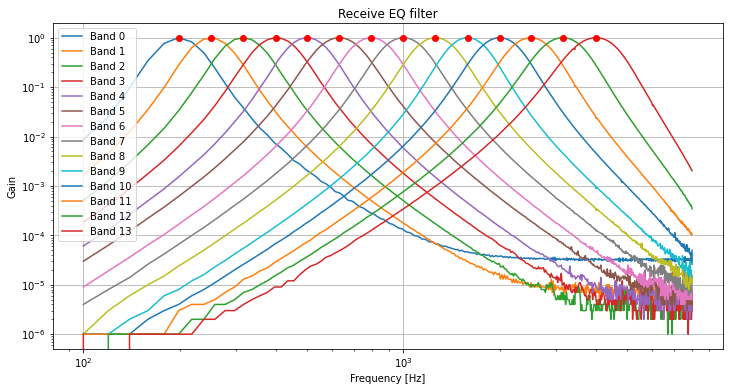

In [3]:
fc = [198.425,250,314.98,400,500,630,793,1000,1259,1587,2000,2500,3150,4000]
plt.figure(figsize=(12,6))
for k in range(14):
    am = np.genfromtxt('build/ReceiveEQ_band_%d.txt'%k,delimiter=",")
    plt.plot(am[:,1],(am[:,2]),label="Band %d"%k)
    plt.plot(fc[k],1,'ro')
    #fref = fc[k]*2
    #Imin = np.argmin(np.abs(am[:,1]-fref))
    #plt.plot(fref,(am[Imin,2]),'ko')
plt.loglog()
plt.grid()
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel("Gain")
plt.title("Receive EQ filter")

# Kim Noise Reduction

Text(0.5, 1.0, 'Kim Noise Reduction')

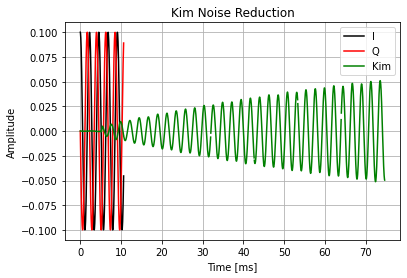

In [26]:
plt.figure()
for k in range(1,7+1):
    kimin = np.genfromtxt('build/KimNR_pre%d.txt'%k,delimiter=",")
    kimout = np.genfromtxt('build/KimNR_post%d.txt'%k,delimiter=",")

    if k == 1:
        plt.plot(((k-1)*256+kimin[:,0])*1/(192000/8)*1000,kimin[:,1],'k-',label="I")
        plt.plot(((k-1)*256+kimin[:,0])*1/(192000/8)*1000,kimin[:,2],'r-',label="Q")
        plt.plot(((k-1)*256+kimout[:,0])*1/(192000/8)*1000,kimout[:,1],'g-',label="Kim")
    else:
        #plt.plot(((k-1)*256+kimin[:,0])*1/(192000/8)*1000,kimin[:,1],'k-')
        #plt.plot(((k-1)*256+kimin[:,0])*1/(192000/8)*1000,kimin[:,2],'r-')
        plt.plot(((k-1)*256+kimout[:,0])*1/(192000/8)*1000,kimout[:,1],'g-')
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("Kim Noise Reduction")

# Xanr Noise

Text(0.5, 1.0, 'Xanr Noise Reduction')

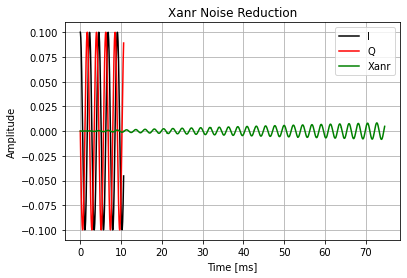

In [27]:
plt.figure()
for k in range(1,7+1):
    xin = np.genfromtxt('build/XanrNR_pre%d.txt'%k,delimiter=",")
    xout = np.genfromtxt('build/XanrNR_post%d.txt'%k,delimiter=",")

    if k == 1:
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-',label="I")
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-',label="Q")
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,2],'g-',label="Xanr")
    else:
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-')
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-')
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,2],'g-')
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("Xanr Noise Reduction")

# Xanr Notch

Text(0.5, 1.0, 'Xanr Notch')

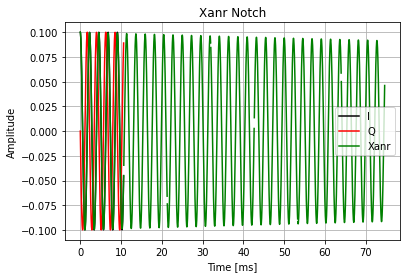

In [28]:
plt.figure()
for k in range(1,7+1):
    xin = np.genfromtxt('build/XanrNotch_pre%d.txt'%k,delimiter=",")
    xout = np.genfromtxt('build/XanrNotch_post%d.txt'%k,delimiter=",")

    if k == 1:
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-',label="I")
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-',label="Q")
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,2],'g-',label="Xanr")
    else:
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-')
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-')
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,2],'g-')
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("Xanr Notch")

# Spectral Noise Reduction

Text(0.5, 1.0, 'Spectral Noise Reduction')

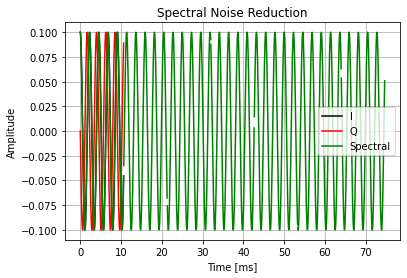

In [29]:
plt.figure()
for k in range(1,7+1):
    xin = np.genfromtxt('build/SpectralNR_pre%d.txt'%k,delimiter=",")
    xout = np.genfromtxt('build/SpectralNR_post%d.txt'%k,delimiter=",")

    if k == 1:
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-',label="I")
        plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-',label="Q")
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,1],'g-',label="Spectral")
    else:
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,1],'k-')
        #plt.plot(((k-1)*256+xin[:,0])*1/(192000/8)*1000,xin[:,2],'r-')
        plt.plot(((k-1)*256+xout[:,0])*1/(192000/8)*1000,xout[:,1],'g-')
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("Spectral Noise Reduction")

# Noise Reduction Function

Text(0.5, 1.0, 'Noise Reduction Function')

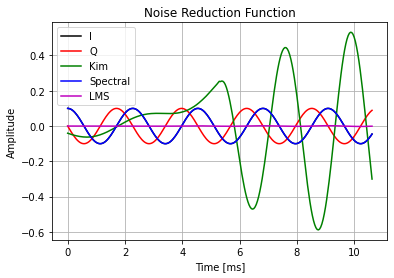

In [30]:
xin = np.genfromtxt('build/NR_preK.txt',delimiter=",")
xout = np.genfromtxt('build/NR_postK.txt',delimiter=",")
sout = np.genfromtxt('build/NR_postS.txt',delimiter=",")
lout = np.genfromtxt('build/NR_postL.txt',delimiter=",")

plt.figure()
plt.plot(xin[:,0]*1/(192000/8)*1000,xin[:,1],'k-',label="I")
plt.plot(xin[:,0]*1/(192000/8)*1000,xin[:,2],'r-',label="Q")
plt.plot(xout[:,0]*1/(192000/8)*1000,xout[:,1],'g-',label="Kim")
plt.plot(sout[:,0]*1/(192000/8)*1000,sout[:,1],'b-',label="Spectral")
plt.plot(lout[:,0]*1/(192000/8)*1000,lout[:,1],'m-',label="LMS")
    
plt.grid()
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel("Amplitude")
plt.title("Noise Reduction Function")

# Receive Processing Mock Data

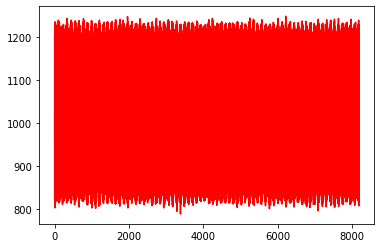

In [31]:
L = open('mock_L_data_int.c','r').readline()
Lvals = L.split('=')[1].strip().strip(';{}').split(',')
si = np.array([int(a) for a in Lvals])
    
R = open('mock_R_data_int.c','r').readline()
Rvals = R.split('=')[1].strip().strip(';{}').split(',')
sq = np.array([int(a) for a in Rvals])

plt.figure()
ind = np.arange(len(si))
plt.plot(ind,si,'k-')
plt.plot(ind,sq,'r-')
#plt.xlim([0,256])

# Receive Processing

Text(0.5, 1.0, 'Output audio: Max at 750.0 Hz')

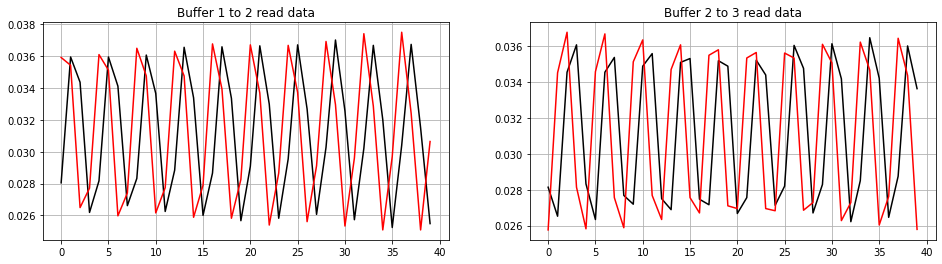

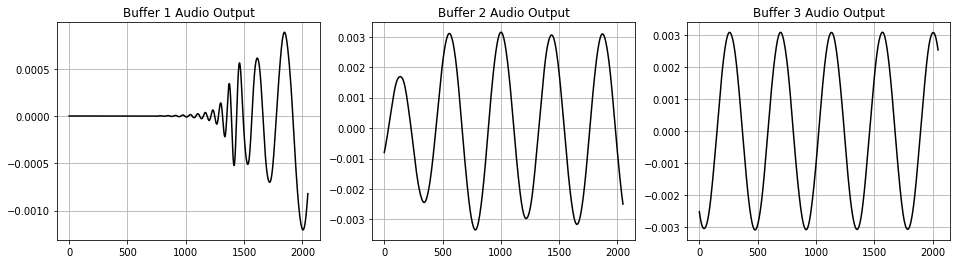

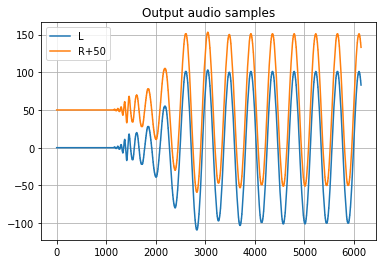

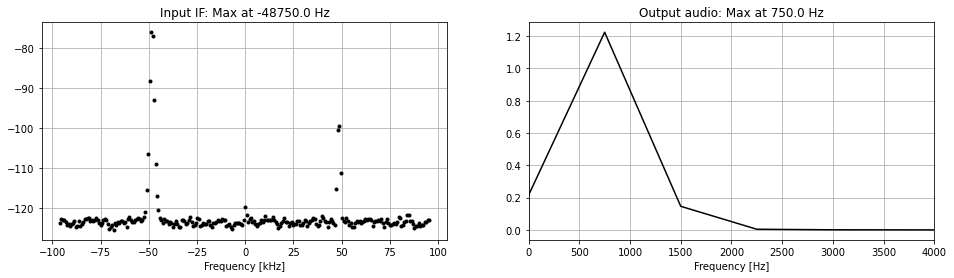

In [71]:
in1IQ=np.genfromtxt('build/IQ_ReceiveProcessing_buffer1.txt',delimiter=",")
in2IQ=np.genfromtxt('build/IQ_ReceiveProcessing_buffer2.txt',delimiter=",")
in3IQ=np.genfromtxt('build/IQ_ReceiveProcessing_buffer3.txt',delimiter=",")

a1=np.genfromtxt('build/ReceiveProcessing_pass1_filtered_IQ.txt',delimiter=",")
a2=np.genfromtxt('build/ReceiveProcessing_pass2_filtered_IQ.txt',delimiter=",")
a3=np.genfromtxt('build/ReceiveProcessing_pass3_filtered_IQ.txt',delimiter=",")

# Make a continuous dataset from the input buffers
Iin = np.array([in1IQ[:,1],in2IQ[:,1],in3IQ[:,1]]).flatten()
Qin = np.array([in1IQ[:,2],in2IQ[:,2],in3IQ[:,2]]).flatten()

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(Iin[(2048-20):(2048+20)],'k-')
plt.plot(Qin[(2048-20):(2048+20)],'r-')
plt.grid()
plt.title("Buffer 1 to 2 read data")

plt.subplot(1,2,2)
plt.plot(Iin[(2048*2-20):(2048*2+20)],'k-')
plt.plot(Qin[(2048*2-20):(2048*2+20)],'r-')
plt.grid()
plt.title("Buffer 2 to 3 read data")


plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(a1[:,0],a1[:,1],'k-')
plt.grid()
plt.title("Buffer 1 Audio Output")

plt.subplot(1,3,2)
plt.plot(a2[:,0],a2[:,1],'k-')
plt.grid()
plt.title("Buffer 2 Audio Output")

plt.subplot(1,3,3)
plt.plot(a3[:,0],a3[:,1],'k-')
plt.grid()
plt.title("Buffer 3 Audio Output")

Lout=np.genfromtxt('build/ReceiveOut_L.txt',delimiter=",")
Rout=np.genfromtxt('build/ReceiveOut_R.txt',delimiter=",")

plt.figure()
plt.plot(Lout,label='L')
plt.plot(Rout+50,label='R+50')
plt.grid()
plt.legend()
plt.title("Output audio samples")


f,P = welch(Iin+1j*Qin,fs=192000,return_onesided=False)
fo,Po = welch(Lout,fs=192000,return_onesided=True)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(f/1000,10*np.log10(P),'k.')
plt.grid()
plt.xlabel('Frequency [kHz]')
plt.title("Input IF: Max at %2.1f Hz"%f[np.argmax(P)])

plt.subplot(1,2,2)
plt.plot(fo,Po,'k-')
plt.xlim([0,4000])
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.title("Output audio: Max at %2.1f Hz"%fo[np.argmax(Po)])


# Long term

Text(0.5, 1.0, 'Code when run in sim mode')

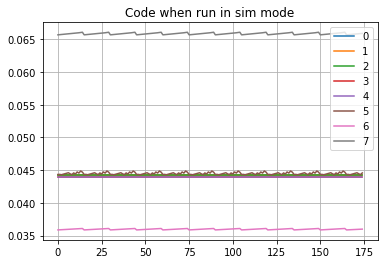

In [6]:
J = np.loadtxt("/home/oliver/Sync/Ham/T41/Software/Phoenix/code/test/build/Terminal_LongTerm.txt",delimiter=",")
plt.figure()
for k in range(8):
    plt.plot(J[:,k],label='%d'%k)
plt.legend()
plt.grid()
plt.title("Code when run in sim mode")